# HQNN-Quanv MNIST Local

- Model: HQNN-Quanv
- Dataset: MNIST
- Computer: local machine (lightning.qubit)


In [6]:
# --- Import Model Components from Python File ---
import sys
from pathlib import Path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))
from hqnn_quanv import HQNNQuanv
from utils import load_mnist, train_model, save_model, load_model, predict_image, evaluate_model

In [7]:
# --- Data Preparation ---
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((14, 14), interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.ToTensor()
])

train_dataset, test_dataset = load_mnist(transform, dataset_portion=1.00)

Using 60000 samples for training and 10000 samples for testing.


In [8]:
# --- Hyperparameters ---
hyperparams = {
    'image_size': 14,  # Reduced size after resizing
    'kernel_size': 2,
    'depth': 3,
    'n_classes': 10,
    'epochs': 10,
    'learning_rate': 0.003,
    'batch_size': 32
}

--- Quantum Circuit Structure ---


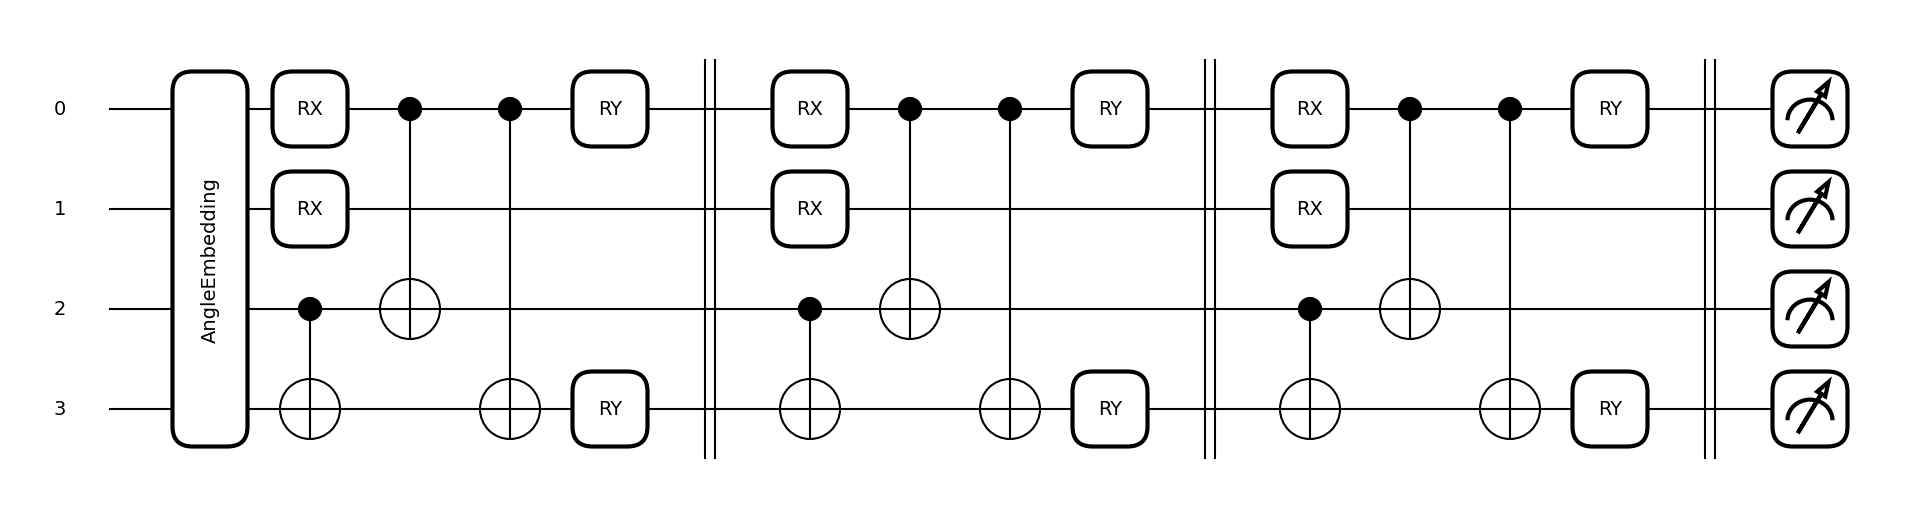

---------------------------------


In [9]:
# --- Initialize Model ---
model = HQNNQuanv(
    draw_circuit=True, 
    **hyperparams
)

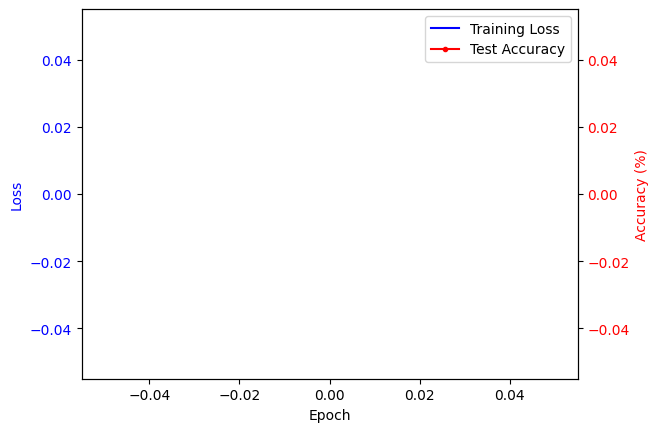

Starting training...
Training interrupted by user. Returning partial history...


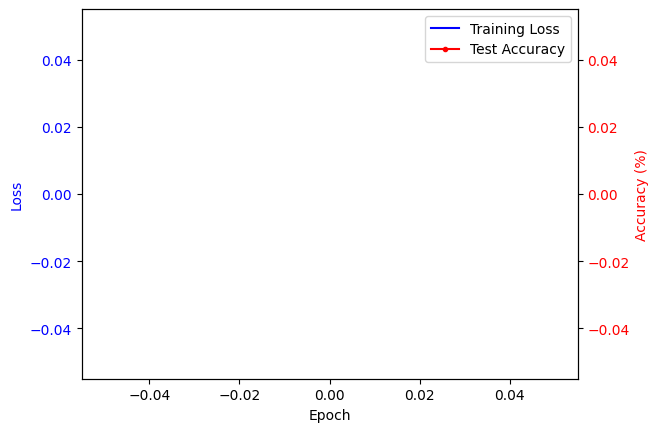

In [10]:
history = train_model(
    model,
    train_dataset,
    test_dataset,
    **hyperparams
)

In [ ]:
# --- Save the Model ---
save_model(model, hyperparams, history, 'hqnn_quanv_mnist_lightning')

Model saved to models/hqnn_quanv_mnist_lightning/hqnn_quanv_mnist_lightning_20250724_153752.pth


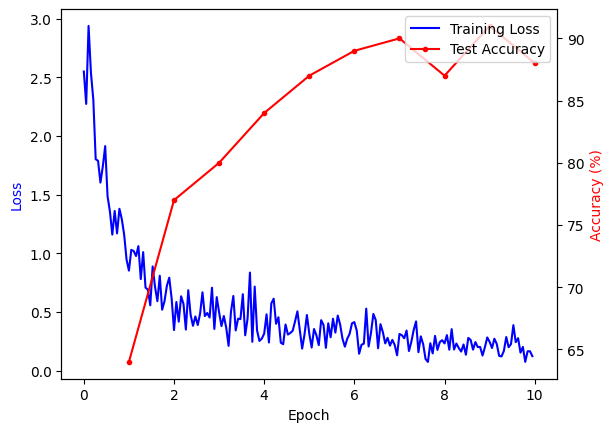

In [ ]:
# Optionally load a saved model to evaluate
# otherwise, evaluate the model trained above

model = load_model(
    HQNNQuanv,
    'models/hqnn_quanv_mnist_lightning/hqnn_quanv_mnist_lightning_20250724_153752.pth'
)

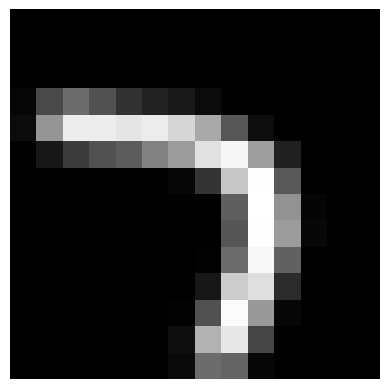

Class 0: 0.0002
Class 1: 0.0004
Class 2: 0.0001
Class 3: 0.0265
Class 4: 0.0001
Class 5: 0.0004
Class 6: 0.0001
Class 7: 0.9627
Class 8: 0.0001
Class 9: 0.0095
Predicted Class: 7, Confidence: 0.9627


In [ ]:
# --- Run Prediction on Random Image ---
predict_image(model, test_dataset)

              precision    recall  f1-score   support

    0 - zero       0.80      1.00      0.89         8
     1 - one       1.00      1.00      1.00        14
     2 - two       0.86      0.75      0.80         8
   3 - three       1.00      0.82      0.90        11
    4 - four       1.00      0.79      0.88        14
    5 - five       0.71      0.71      0.71         7
     6 - six       1.00      1.00      1.00        10
   7 - seven       0.78      0.93      0.85        15
   8 - eight       0.67      1.00      0.80         2
    9 - nine       0.82      0.82      0.82        11

    accuracy                           0.88       100
   macro avg       0.86      0.88      0.86       100
weighted avg       0.89      0.88      0.88       100



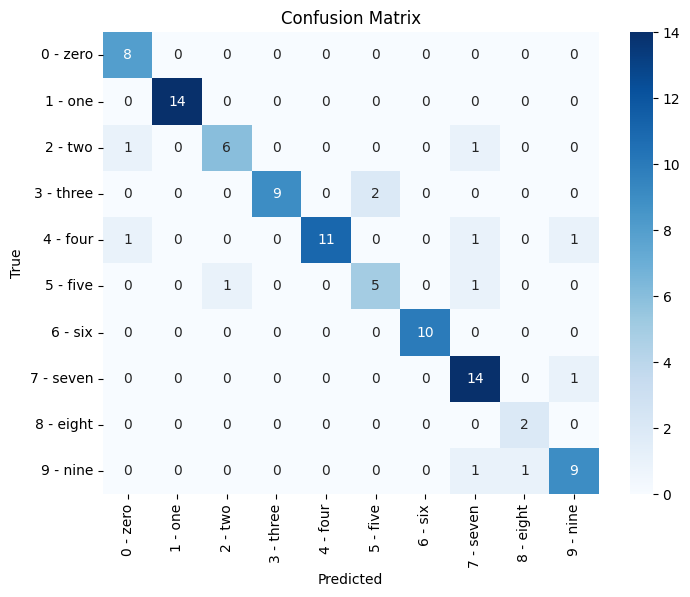

In [ ]:
# --- Evaluate Model ---
test_accuracy = evaluate_model(model, test_dataset)